## Text Mining Seneca's Letters

by Henry Bechtel

Seneca was a famous Roman statesman, philosopher, and Stoic who lived in the first century CE. Seneca has, perhaps, the largest body of stoic writings that has survived from ancient times, of which, his letters to Lucilius are some of his most famous works. As I have a deep interest in Stoic philosophy and data science, his letters provide an excellent subject for exploration and application of unsupervied machine learning techniques.


### Web Scraping

First, we'll have to get Seneca's letters into a usable form. We will use BeautufulSoup to do some web scraping from the source below: 

__Moral letters to Lucilius__ (Epistulae morales ad Lucilium) <br>
by Seneca, translated by Richard Mott Gummere <br>
Loeb Classical Library edition; volume 1 published 1917; volume 2 published 1920; volume 3 published 1925 <br>
Letters collected from https://en.wikisource.org/wiki/Moral_letters_to_Lucilius 

In [397]:
import requests
from bs4 import BeautifulSoup

In [525]:
url_base_string = "https://en.wikisource.org/wiki/Moral_letters_to_Lucilius/Letter_" 
letters = pd.DataFrame(index=range(1,125), columns=["Letter", "Title", "Text"])

In [526]:
for i in range(1, 125):
    page = requests.get(url_base_string + str(i))
    soup = BeautifulSoup(page.text, "html.parser")
    letter_div = soup.find(class_='mw-parser-output')
    letter_paragraphs = letter_div.find_all("p")
    letter_text = ""
    for j in range(len(letter_paragraphs)):
        letter_text = letter_text + letter_paragraphs[j].text
        letters.loc[i, "Letter"] = str(i)
        letters.loc[i, "Text"] = letter_text

In [533]:
letters.head()

,Letter,Title,Text
1,1,"Letter[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75...","Greetings from Seneca to his friend Lucilius. \n1. Continue to act thus, my dear Lucilius – set yourself free for your own sake; gather and save your time, which till lately has been forced from you, or filched away, or has merely slipped from your hands. Make yourself believe the truth of my wo..."
2,2,"Letter[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75...","1. Judging by what you write me, and by what I hear, I am forming a good opinion regarding your future. You do not run hither and thither and distract yourself by changing your abode; for such restlessness is the sign of a disordered spirit. The primary indication, to my thinking, of a well-or..."
3,3,"Letter[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75...","1. You have sent a letter to me through the hand of a ""friend"" of yours, as you call him. And in your very next sentence you warn me not to discuss with him all the matters that concern you, saying that even you yourself are not accustomed to do this; in other words, you have in the same letter..."
4,4,"Letter[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75...","1. Keep on as you have begun, and make all possible haste, so that you may have longer enjoyment of an improved mind, one that is at peace with itself. Doubtless you will derive enjoyment during the time when you are improving your mind and setting it at peace with itself; but quite different i..."
5,5,"Letter[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75...","1. I commend you and rejoice in the fact that you are persistent in your studies, and that, putting all else aside, you make it each day your endeavour to become a better man. I do not merely exhort you to keep at it; I actually beg you to do so. I warn you, however, not to act after the fashi..."


In [402]:
letters.to_csv("../data/letters.csv", index=False)

### Unsupervised Machine Learning

I'm ultimately interested in seeing what kinds of natural clusters/themes/topics are contained in the letters. First, we'll have to preprocess the text.

In [551]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, ward

pd.options.display.max_colwidth = 300
%matplotlib inline

In [534]:
letters = pd.read_csv("../data/letters.csv", index_col="Letter")

In [535]:
letters.shape

(124, 1)

In [536]:
letters.tail()

,Text
Letter,
120,"1. Your letter roamed, over several little problems, but finally dwelt upon this alone, asking for explanation: ""How do we acquire a knowledge of that which is good and that which is honourable?"" In the opinion of other schools,[1] these two qualities are distinct; among our followers, however, ..."
121,"1. You will bring suit against me, I feel sure, when I set forth for you to-day's little problem, with which we have already fumbled long enough. You will cry out again: ""What has this to do with character?"" Cry out if you like, but let me first of all match you with other opponents,[1] against..."
122,"1. The day has already begun to lessen. It has shrunk considerably, but yet will still allow a goodly space of time if one rises, so to speak, with the day itself. We are more industrious, and we are better men if we anticipate the day and welcome the dawn; but we are base churls if we lie doz..."
123,"1. Wearied with the discomfort rather than with the length of my journey, I have reached my Alban villa late at night, and I find nothing in readiness except myself. So I am getting rid of fatigue at my writing-table: I derive some good from this tardiness on the part of my cook and my baker. ..."
124,"1. Full many an ancient precept could I give,\nDidst thou not shrink, and feel it shame to learn\nSuch lowly duties.[1]\nBut you do not shrink, nor are you deterred by any subtleties of study. For your cultivated mind is not wont to investigate such important subjects in a free-and-easy manner. ..."


In [472]:
num = []
for i in range(1000):
    num.append(str(i))

In [561]:
my_stopwords = ENGLISH_STOP_WORDS.union(num)
tfidf_vec = TfidfVectorizer(use_idf=False, 
                            stop_words=my_stopwords, 
                            max_features=100,
                           )

In [562]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [563]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df.head()

,according,age,ask,away,believe,better,body,case,certain,come,...,truth,unless,use,virtue,way,wisdom,wise,wish,words,work
Letter,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.098533,0.098533,0.000000,0.000000,0.0,0.098533,0.000000,...,0.098533,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.098533,0.0
2,0.000000,0.000000,0.131306,0.000000,0.000000,0.000000,0.131306,0.0,0.000000,0.131306,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.131306,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.072357,0.000000,...,0.000000,0.000000,0.0,0.000000,0.144715,0.000000,0.0,0.000000,0.144715,0.0
4,0.000000,0.050637,0.000000,0.151911,0.000000,0.000000,0.000000,0.0,0.000000,0.101274,...,0.000000,0.050637,0.0,0.050637,0.000000,0.050637,0.0,0.000000,0.000000,0.0
5,0.070711,0.000000,0.000000,0.070711,0.070711,0.070711,0.070711,0.0,0.000000,0.070711,...,0.000000,0.000000,0.0,0.000000,0.282843,0.000000,0.0,0.141421,0.070711,0.0


#### What words have the highest frequency? 
(we have not weigthed by idf yet)

In [564]:
tfidf_df.sum().sort_values(ascending=False).head(15)

man       38.836540
men       24.501838
good      19.714522
things    18.678982
shall     17.123372
life      17.044555
time      15.511070
does      14.038058
make      11.507133
mind      11.158131
say       11.136783
let       10.409032
great     10.301426
soul       9.976897
death      9.941931
dtype: float64

#### Now we will weight by inverse document frequency

In [565]:
tfidf_vec.use_idf = True

In [566]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [567]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df.head()

,according,age,ask,away,believe,better,body,case,certain,come,...,truth,unless,use,virtue,way,wisdom,wise,wish,words,work
Letter,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.097262,0.115394,0.000000,0.000000,0.0,0.094795,0.000000,...,0.122299,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.098958,0.0
2,0.000000,0.000000,0.149725,0.000000,0.000000,0.000000,0.164068,0.0,0.000000,0.134907,...,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.159539,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.062085,0.000000,...,0.000000,0.00000,0.0,0.000000,0.120037,0.000000,0.0,0.000000,0.129623,0.0
4,0.000000,0.070493,0.000000,0.153290,0.000000,0.000000,0.000000,0.0,0.000000,0.098758,...,0.000000,0.06689,0.0,0.069008,0.000000,0.069743,0.0,0.000000,0.000000,0.0
5,0.101431,0.000000,0.000000,0.073522,0.087229,0.084806,0.086408,0.0,0.000000,0.071050,...,0.000000,0.00000,0.0,0.000000,0.277087,0.000000,0.0,0.168046,0.074804,0.0


#### and see which words have the highest tf-idf values

In [568]:
tfidf_df.max().sort_values(ascending=False).head(15)

living        0.833362
friend        0.825446
precepts      0.800622
good          0.787287
death         0.778658
philosophy    0.771825
wise          0.750597
day           0.676441
god           0.672064
pain          0.654998
life          0.634283
man           0.630981
words         0.626718
body          0.625182
did           0.601530
dtype: float64

#### Hierarchical Clustering

By using hierarchical clustering, we can get a (visual) sense of whether or not there are any natural clusters across Seneca's 124 letters.

In [569]:
dist = 1 - cosine_similarity(X=tfidf_mat)

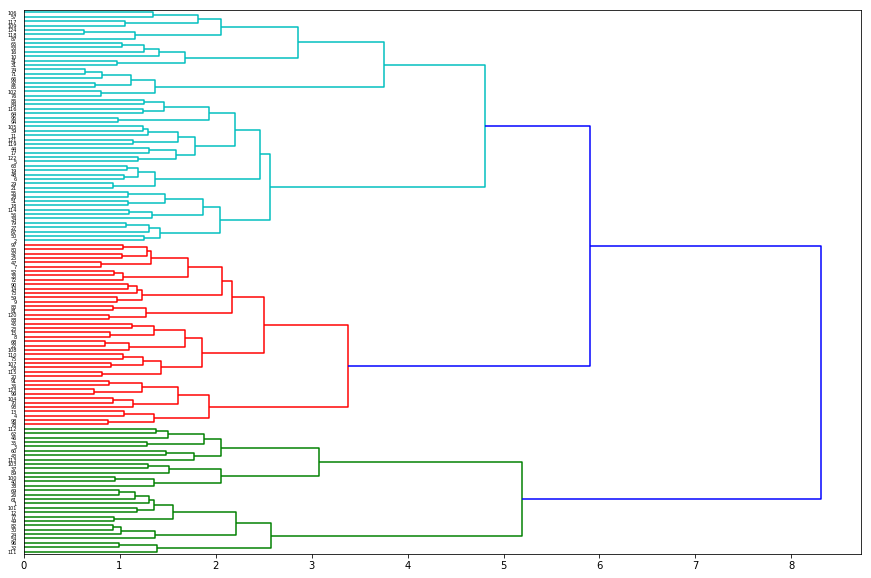

In [570]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = dendrogram(ward(dist), orientation='right', labels=letters.index)
plt.show()

#### K-means Clustering

In [571]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)

In [572]:
model = km.fit(tfidf_mat)

In [574]:
model_centroids_sorted = model.cluster_centers_.argsort()[:,::-1]
model_centroids_sorted

array([[51, 30, 93, 86, 96, 55, 65, 28, 81, 18,  6, 35, 58, 41, 20, 95, 39,
        49, 24, 75, 72, 31, 37, 32, 94, 38, 57, 79,  8, 29, 85, 74, 25, 40,
        88, 52, 26, 99,  9, 69,  2, 66, 92, 64, 42, 87, 61,  0, 70, 83, 33,
        80, 15, 91, 50,  7, 22, 68, 36, 44, 59, 98, 21, 17, 77, 53, 84, 12,
        10, 97,  3, 71, 89, 76,  5, 73, 90, 54, 34, 46, 67, 23, 56, 62, 19,
        78, 11, 47, 82, 48, 45, 63, 43, 14, 13,  4, 16, 27, 60,  1],
       [13, 41, 51, 88, 12, 86, 60, 16, 79, 46, 18, 24,  1, 55,  3, 75, 44,
        63, 19, 49, 57, 40, 87, 30, 48, 38, 25, 85, 14,  9, 39, 58,  6, 81,
        43, 66, 83, 10, 27, 98, 32, 54, 93, 59,  2, 73, 69, 62, 45, 78, 72,
        56, 42, 11,  8, 20,  4, 34, 94, 53, 36, 80, 15, 23, 61, 52, 84, 67,
        82, 21, 68, 99, 50, 71, 26, 92, 90, 64, 91, 47, 37, 29,  7, 17,  5,
        28, 33, 76, 89, 96, 22, 97, 31, 65, 95, 77, 35,  0, 74, 70],
       [51, 55, 79, 88, 86, 98, 30, 18, 40, 57, 32, 27, 56, 41, 75, 39, 49,
        42, 94, 81, 46, 72

In [575]:
feature_names = tfidf_vec.get_feature_names()
top_words_string = ""

for i in range(num_clusters):
    top_words_string = "Cluster" + str(i) + ": "
    for term_idx in model_centroids_sorted[i, :10]:
        top_words_string = top_words_string + " " + feature_names[term_idx] + ", "
    print(top_words_string)
    
    
    

Cluster0:  man,  good,  virtue,  things,  wise,  men,  philosophy,  god,  soul,  does, 
Cluster1:  death,  life,  man,  time,  day,  things,  old,  die,  shall,  long, 
Cluster2:  man,  men,  shall,  time,  things,  words,  good,  does,  let,  mind, 


In [576]:
tfidf_df["cluster"] = km.labels_

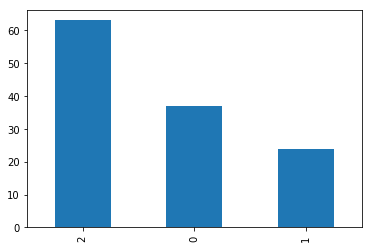

In [577]:
tfidf_df["cluster"].value_counts().plot("bar");